 s: ^^__^^^^^^^^___
 r: ^^^^^^__^^__
 Q: __^^^^_______
~Q: ^^____^^^^^^___
 d: __^^^^_______
~d: ^^____^^^^^^___

 s: ^^__^^^^___
 r: ^^^^^^_____
 Q: __^^^^_____
~Q: ^^____^^___


 s: __^____^^^^^
 r: _____^___^^^
 Q: __^^^__^^___
~Q: ^^___^^____




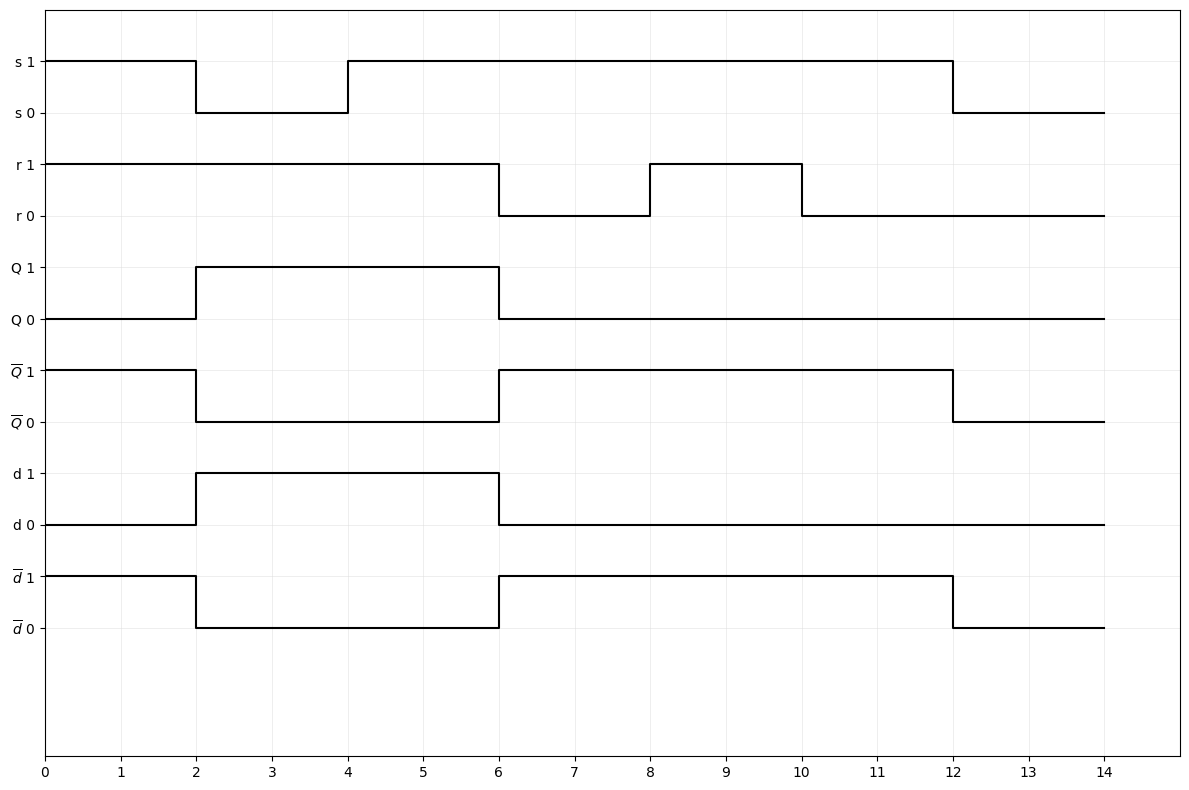

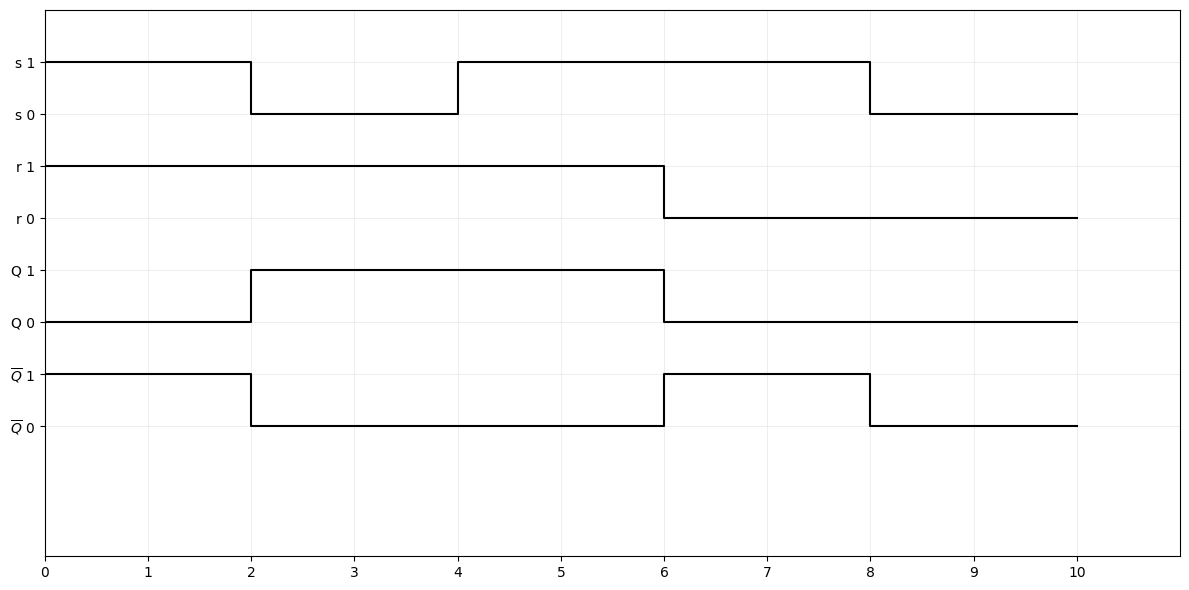

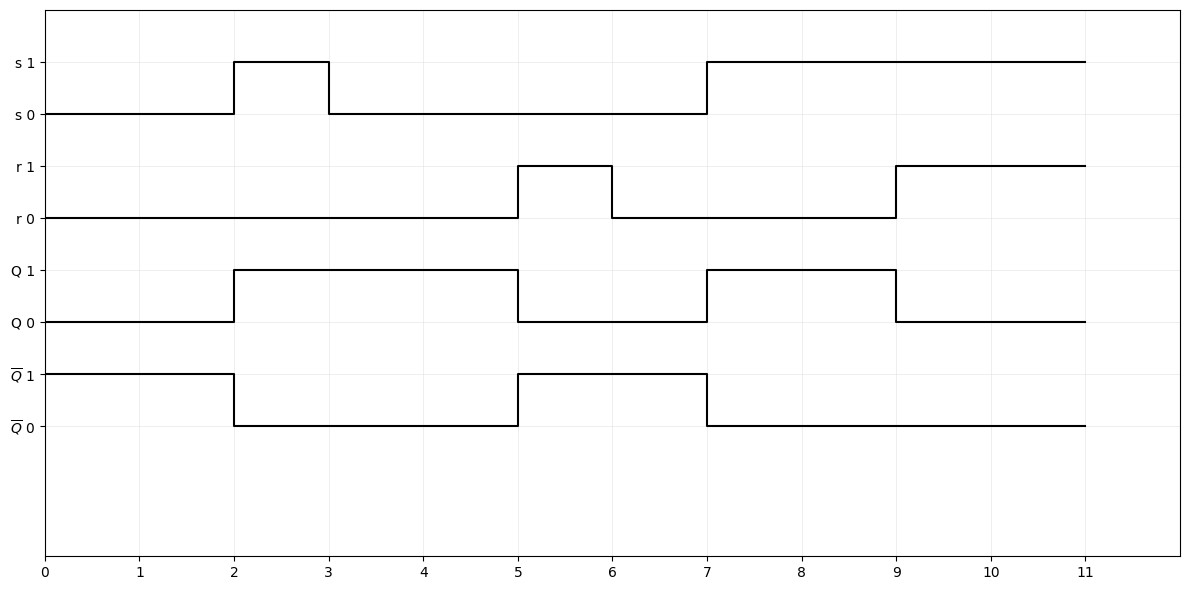

[<Figure size 1200x800 with 1 Axes>,
 <Figure size 1200x600 with 1 Axes>,
 <Figure size 1200x600 with 1 Axes>]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re

def parse_signal_file(filename):
    # czytaj i parsuj sygnaly
    with open(filename, 'r') as f:
        content = f.read()

    print(content)
    
    groups = re.split(r'\n\s*\n', content.strip())
    
    all_signals = []
    for group in groups:
        if not group.strip():
            continue
        
        signals = {}
        for line in group.strip().split('\n'):
            match = re.match(r'\s*([^:]+):\s*(.+)', line)
            if match:
                signal_name = match.group(1).strip()
                signal_pattern = match.group(2).strip()
                signals[signal_name] = signal_pattern
        
        if signals:
            all_signals.append(signals)
    
    return all_signals

def format_signal_name(name):
    # tucowski aeiowska negacja
    if name.startswith('~'):
        return f"$\\overline{{{name[1:]}}}$"
    return name

def plot_signal_group(signals):
    signal_names = list(signals.keys())
    patterns = list(signals.values())
    max_length = max(len(pattern) for pattern in patterns)
    
    binary_signals = {}
    for i, (name, pattern) in enumerate(signals.items()):
        if len(pattern) < max_length:
            pattern = pattern + '_' * (max_length - len(pattern))
        
        level = 2 * (len(signals) - i)
        binary_signals[name] = np.array([1 if ch == '^' else 0 for ch in pattern]) + level
    
    t = np.arange(max_length)
    
    fig = plt.figure(figsize=(12, 2 + len(signals)))
    ax = fig.add_subplot(111)
    
    ax.set_facecolor('white')
    
    for name, signal_array in enumerate(binary_signals.items()):
        name, signal_array = signal_array
        plt.step(t, signal_array, label=format_signal_name(name), where="post", color='black', linewidth=1.5)
    
    ytick_positions = []
    ytick_labels = []
    
    for i, name in enumerate(signal_names):
        formatted_name = format_signal_name(name)
        level_base = 2 * (len(signals) - i)
    
        ytick_positions.extend([level_base, level_base + 1])
    
        ytick_labels.extend([f"{formatted_name} 0", f"{formatted_name} 1"])
    
    plt.yticks(ytick_positions, ytick_labels)
    plt.xticks(np.arange(0, max_length, 1))
    plt.xlim(0, max_length)
    plt.ylim(-0.5, 2 * len(signals) + 2)
    
    plt.grid(True, color='#dddddd', linestyle='-', linewidth=0.5, alpha=0.7)
    
    plt.tight_layout()
    
    return fig

def main(filename):
    signal_groups = parse_signal_file(filename)
    figures = []
    
    for i, signals in enumerate(signal_groups):
        figures.append(plot_signal_group(signals))
    
    plt.show()
    return figures

main("wykres.txt")